In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

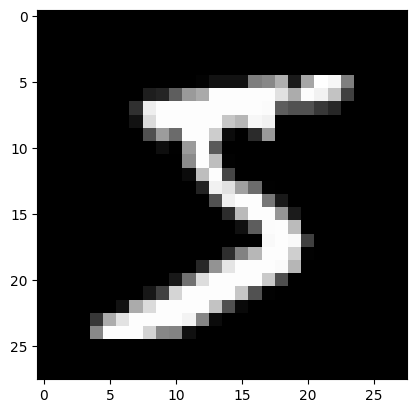

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap = 'gray')

In [ ]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPool2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9950 - loss: 0.0177 - val_accuracy: 0.9910 - val_loss: 0.0320
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9978 - loss: 0.0070 - val_accuracy: 0.9898 - val_loss: 0.0390
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9981 - loss: 0.0067 - val_accuracy: 0.9885 - val_loss: 0.0426
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9989 - loss: 0.0043 - val_accuracy: 0.9904 - val_loss: 0.0400
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9983 - loss: 0.0056 - val_accuracy: 0.9908 - val_loss: 0.0453
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9978 - loss: 0.0062 - val_accuracy: 0.9920 - val_loss: 0.0331
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9991 - loss: 0.0027 - val_accuracy: 0.9917 - val_loss: 0.0417
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9985 - loss: 0.005

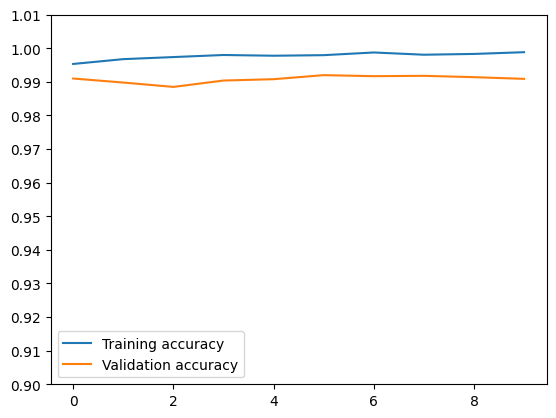

In [ ]:
import numpy as np

plt.plot(history.history['accuracy'], label = 'Training accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
# plt.ylim(0.9, 1.0)
plt.yticks(np.arange(0.9, 1.02, 0.01))
plt.legend()

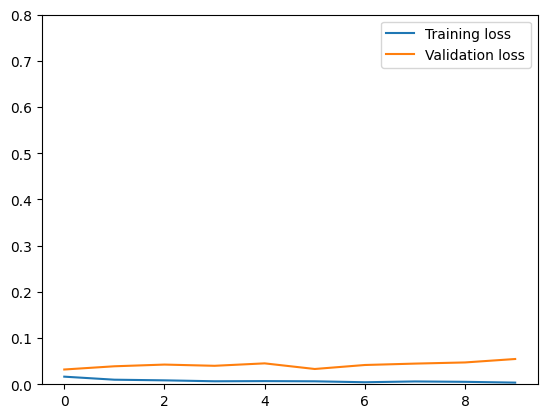

In [ ]:
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.yticks(np.arange(0, 0.9, 0.1))
plt.legend()

In [ ]:
history.history['val_accuracy']

[0.9791666865348816,
 0.984749972820282,
 0.9877499938011169,
 0.987666666507721,
 0.987500011920929,
 0.9885833263397217,
 0.9907500147819519,
 0.9884999990463257,
 0.9910833239555359,
 0.9878333210945129]

In [ ]:
model.save("mnist_model.h5")

In [ ]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
y_pred[0]

array([5.4963808e-23, 1.6482300e-16, 6.5654384e-14, 6.8249803e-15,
       1.0268523e-09, 3.0772509e-19, 9.0436715e-21, 1.0000000e+00,
       3.9406264e-19, 6.1207936e-14], dtype=float32)

In [ ]:
np.argmax(y_pred[0])

np.int64(7)

In [ ]:
y_test[0]

np.uint8(7)

In [ ]:
y_pred_values = np.argmax(y_pred, axis = 1)

In [ ]:
y_pred_values.shape

(10000,)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

<Axes: >

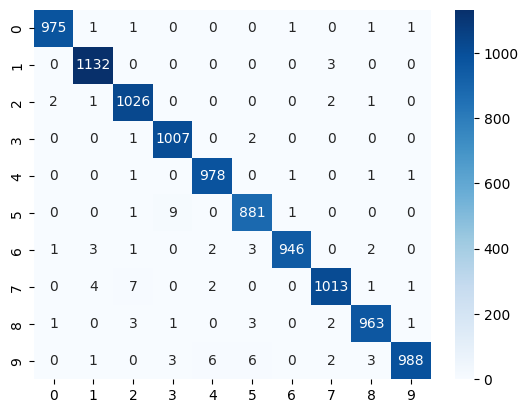

In [ ]:
cm = confusion_matrix(y_test, y_pred_values)
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd')

In [ ]:
print(classification_report(y_test, y_pred_values))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

